In [3]:
# Import
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
# Import data
data = pd.read_csv('./data/data_stocks.csv', header=0)

# Drop date variable
data = data.drop(['DATE'], 1)

# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

# Make data a np.array
data = data.values

# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

# Number of stocks in training data
n_stocks = X_train.shape[1]

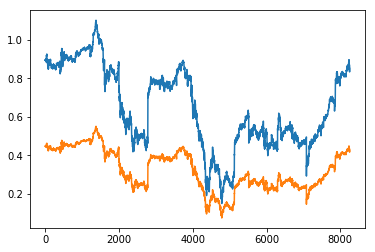

In [5]:
# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

# Session
net = tf.InteractiveSession()

# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Init
net.run(tf.global_variables_initializer())

# Setup plot
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

MSE Train:  1.0589688
MSE Test:  1.6841168


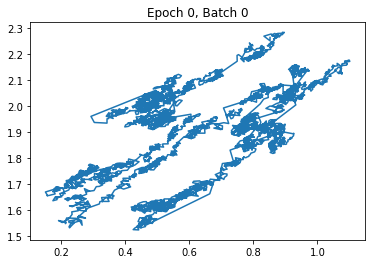

MSE Train:  0.0008894751
MSE Test:  0.027800638


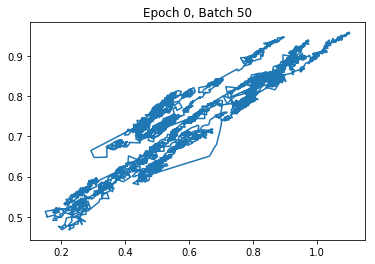

MSE Train:  0.00019608071
MSE Test:  0.021098448


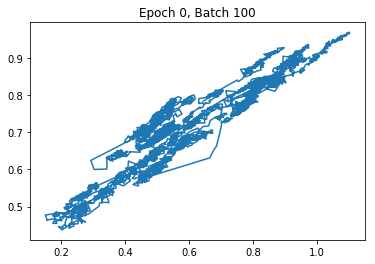

MSE Train:  0.0010967453
MSE Test:  0.016057879


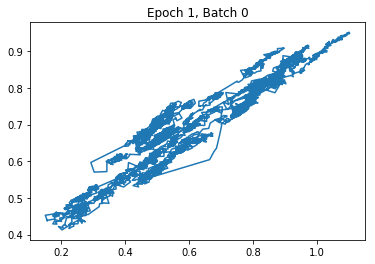

MSE Train:  0.0003530506
MSE Test:  0.016836077


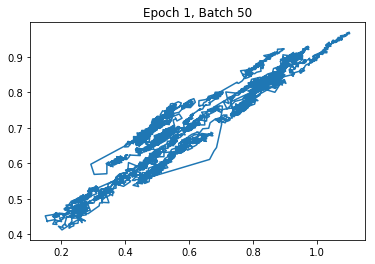

MSE Train:  0.00038877723
MSE Test:  0.011289065


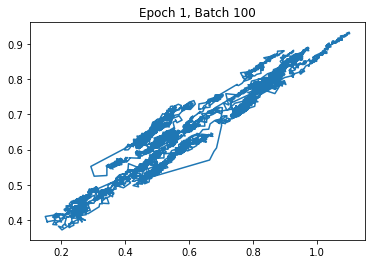

MSE Train:  9.742322e-05
MSE Test:  0.012127736


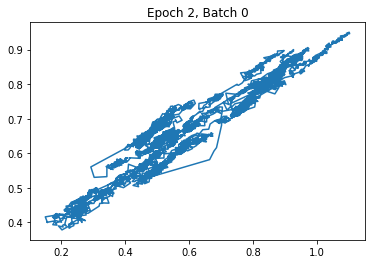

MSE Train:  0.0009667502
MSE Test:  0.014250751


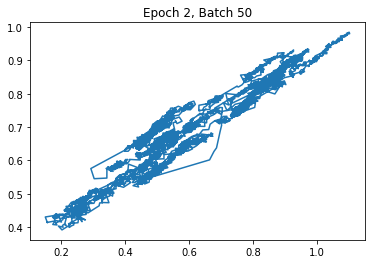

MSE Train:  0.00010428343
MSE Test:  0.012179686


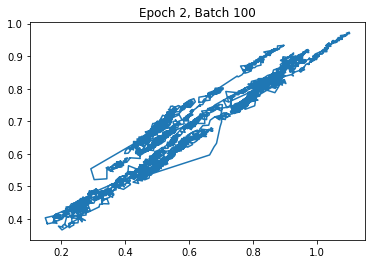

MSE Train:  0.00013539691
MSE Test:  0.012321545


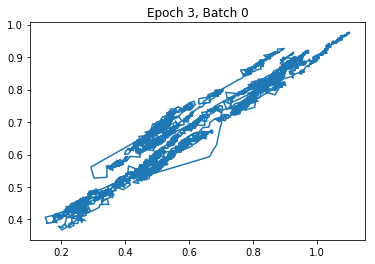

MSE Train:  8.39587e-05
MSE Test:  0.01084191


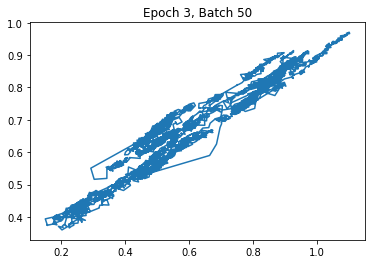

MSE Train:  7.359707e-05
MSE Test:  0.0085220635


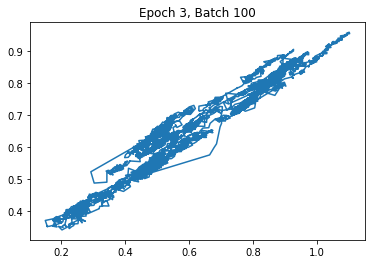

MSE Train:  0.00013976176
MSE Test:  0.008858649


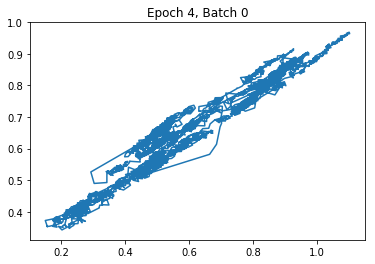

MSE Train:  0.00016094324
MSE Test:  0.008598968


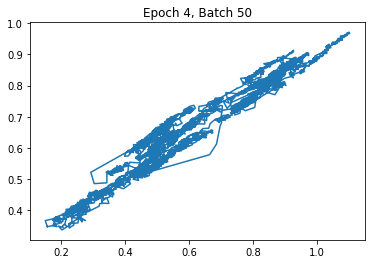

MSE Train:  0.00014671408
MSE Test:  0.0075698458


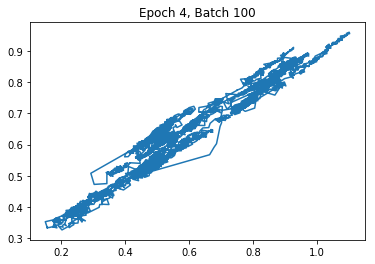

MSE Train:  0.00016984674
MSE Test:  0.0069724503


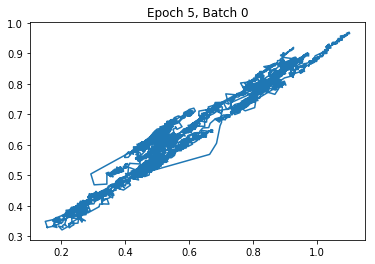

MSE Train:  7.527977e-05
MSE Test:  0.006779385


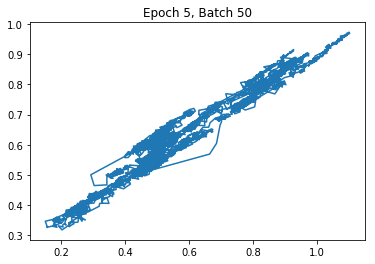

MSE Train:  6.351387e-05
MSE Test:  0.006985269


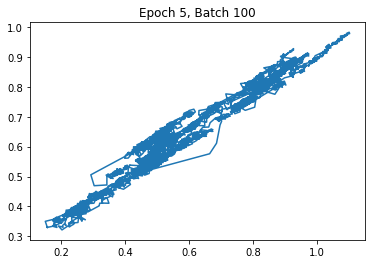

MSE Train:  6.9044625e-05
MSE Test:  0.006294961


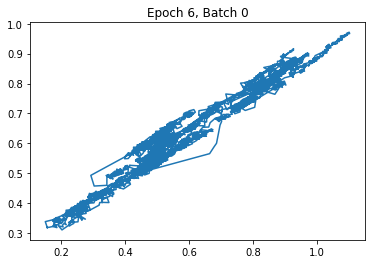

MSE Train:  0.0001598673
MSE Test:  0.0058811815


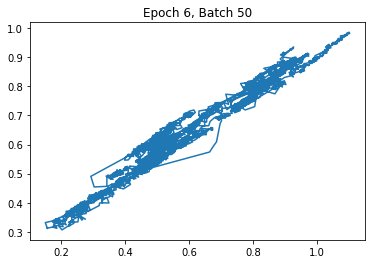

MSE Train:  0.00013110996
MSE Test:  0.004547444


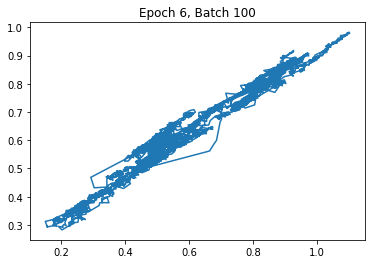

MSE Train:  0.00020879797
MSE Test:  0.004567743


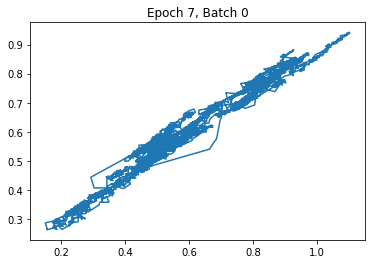

MSE Train:  8.418837e-05
MSE Test:  0.0033440762


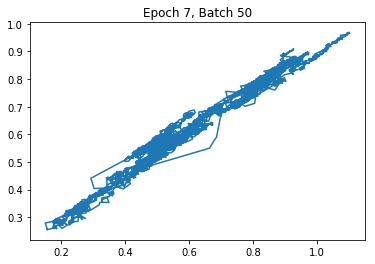

MSE Train:  9.053978e-05
MSE Test:  0.0029840851


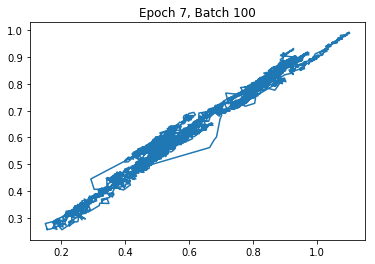

MSE Train:  0.00029037625
MSE Test:  0.0028878737


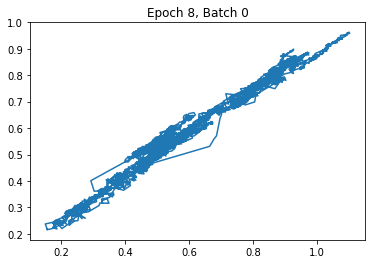

MSE Train:  7.599919e-05
MSE Test:  0.0022782744


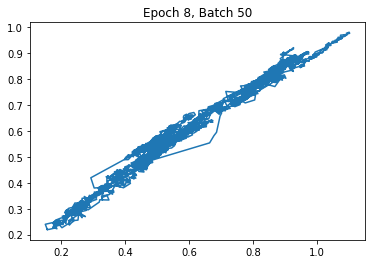

MSE Train:  5.4856588e-05
MSE Test:  0.0025806632


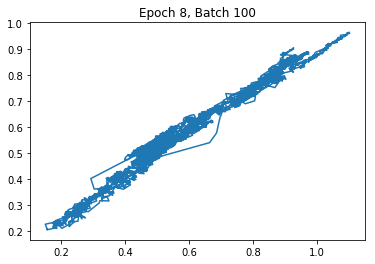

MSE Train:  8.370499e-05
MSE Test:  0.002944683


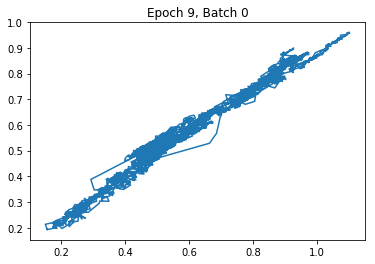

MSE Train:  0.00015798598
MSE Test:  0.0026108872


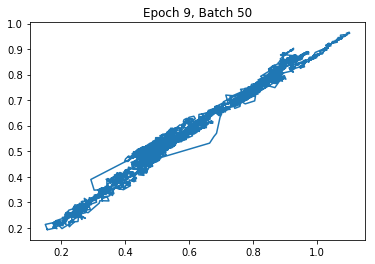

MSE Train:  0.0002721657
MSE Test:  0.0030903125


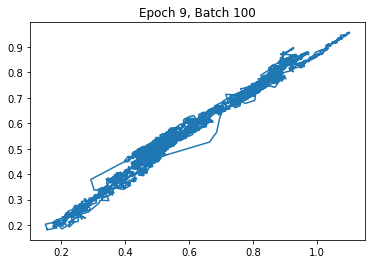

MSE Train:  0.00021159911
MSE Test:  0.0010062146


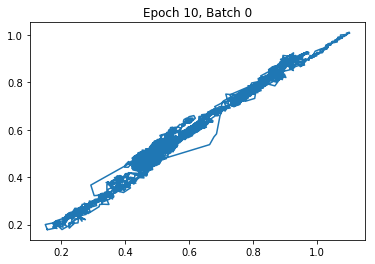

MSE Train:  4.920874e-05
MSE Test:  0.002091874


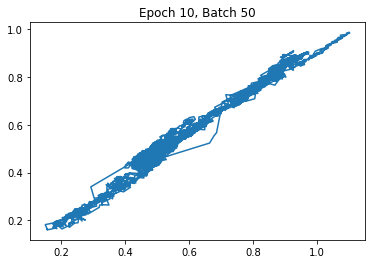

MSE Train:  6.762906e-05
MSE Test:  0.0022535953


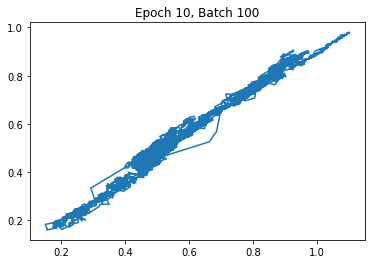

MSE Train:  5.9747494e-05
MSE Test:  0.0015295162


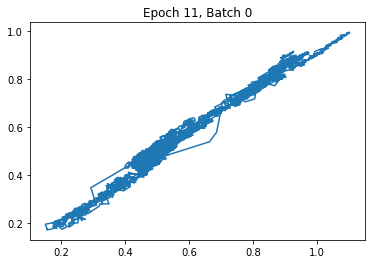

MSE Train:  7.87682e-05
MSE Test:  0.0018829453


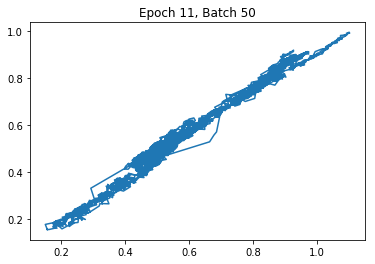

MSE Train:  6.5810855e-05
MSE Test:  0.0023407042


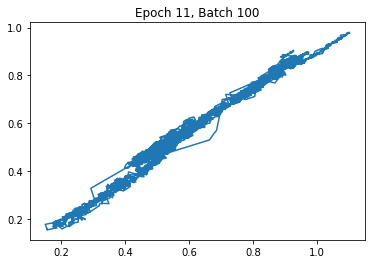

MSE Train:  6.21678e-05
MSE Test:  0.0011999427


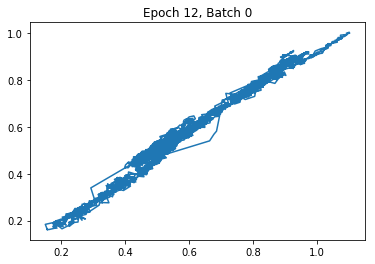

MSE Train:  5.917007e-05
MSE Test:  0.0017108307


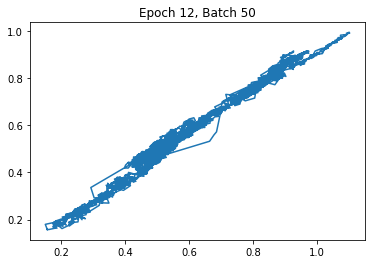

MSE Train:  5.986723e-05
MSE Test:  0.001737306


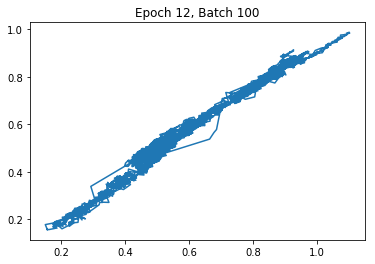

MSE Train:  6.3100415e-05
MSE Test:  0.00129107


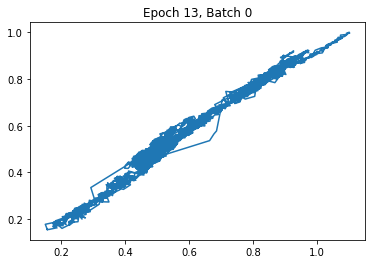

MSE Train:  0.00016108686
MSE Test:  0.001542891


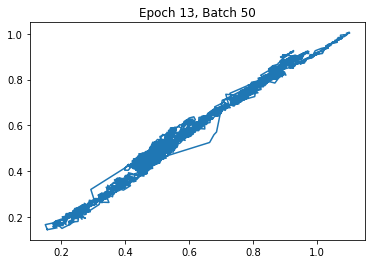

MSE Train:  8.46385e-05
MSE Test:  0.004251929


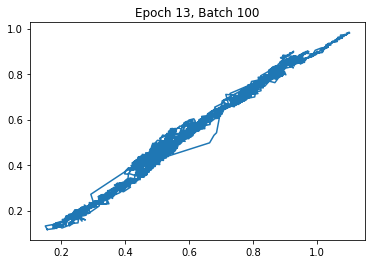

MSE Train:  0.00013709607
MSE Test:  0.0032643718


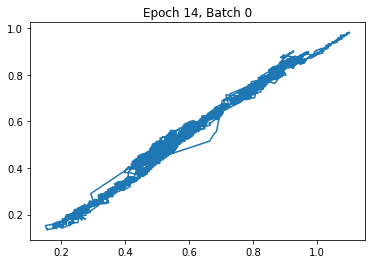

MSE Train:  6.812677e-05
MSE Test:  0.002841965


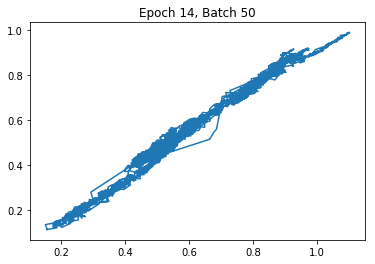

MSE Train:  4.356207e-05
MSE Test:  0.0031755634


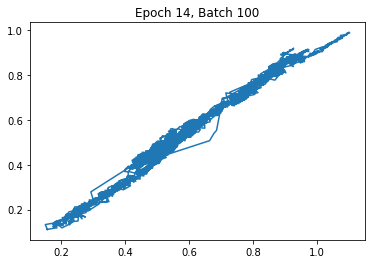

In [ ]:
y_test = y_test.reshape(8253, )

# Fit neural net
batch_size = 256
mse_train = []
mse_test = []

# Run
epochs = 20
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            pred = pred.reshape(8253, )
            fig = plt.figure()
            ax1 = fig.add_subplot(111)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            ax1.plot(y_test, pred)
            plt.show()
            
net.close()